## IMPORTATION DES MODULES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle

### I- TRAITEMENT DES DONNEES

LKK

## IMPORTER LES DONNEES

In [3]:
df= pd.read_csv('concrete.csv')
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Dimensions

In [4]:
df.shape

(1030, 9)

### valeurs manquentes

In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### types des variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### verification des doublons

In [6]:
nbre_doublons= df.duplicated().sum()
nbre_doublons

np.int64(25)

In [7]:
nombre_doublons = df.duplicated().sum()
pourcentage_doublons = (nombre_doublons / len(df)) * 100

print(f"Nombre total de lignes : {len(df)}")
print(f"Nombre de doublons : {nombre_doublons}")
print(f"Pourcentage de doublons : {pourcentage_doublons:.2f}%")

# Afficher les lignes dupliquées (optionnel)
if nombre_doublons > 0:
    print("\nLignes dupliquées :")
    doublons = df[df.duplicated(keep=False)]  # keep=False montre tous les doublons
    print(doublons.sort_values(by=df.columns.tolist()))

Nombre total de lignes : 1030
Nombre de doublons : 25
Pourcentage de doublons : 2.43%

Lignes dupliquées :
     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
801   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
809   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
83    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
86    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
88    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
91    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
106   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
109   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
111   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
129   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
132   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
134   362.6  189.

In [8]:
doublons.tail(7)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
172,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
177,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
179,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
182,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
801,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
809,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69


### supression des doublons en laissant les premieres occurrence

In [9]:
# Créer DF sans doublons
DF = df.drop_duplicates(keep='first').reset_index(drop=True)
# afficharge des dimensions
print(f"Ancien DataFrame : {len(df)} lignes")
print(f"Nouveau DataFrame DF : {len(DF)} lignes")
print(f"Doublons supprimés : {len(df) - len(DF)}")

Ancien DataFrame : 1030 lignes
Nouveau DataFrame DF : 1005 lignes
Doublons supprimés : 25


## II- STATISTIQUES DESCRIPTIVES

## ANALYSE UNVARIEE

In [8]:
DF.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## VISUALISATION DES VARIABLES:Ici, nous construisons les histogrammes des variables 

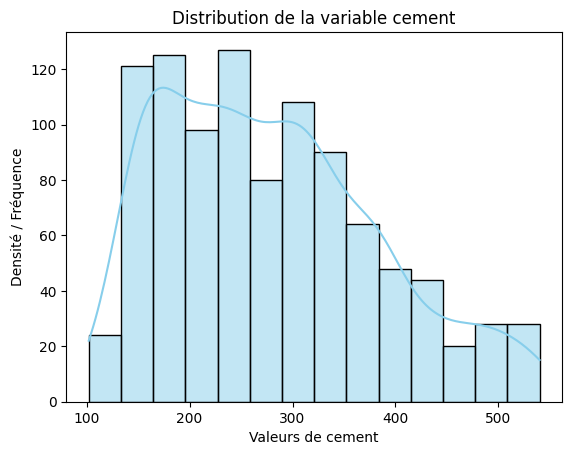

CONCLUSION: La variable <<cement>> semble suivre une distribution normale , avec une asymetrie a droite.


In [10]:
# Histogramme de cement
sns.histplot(data=DF, x='cement', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable cement")
plt.xlabel("Valeurs de cement")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<cement>> semble suivre une distribution normale , avec une asymetrie a droite.") 


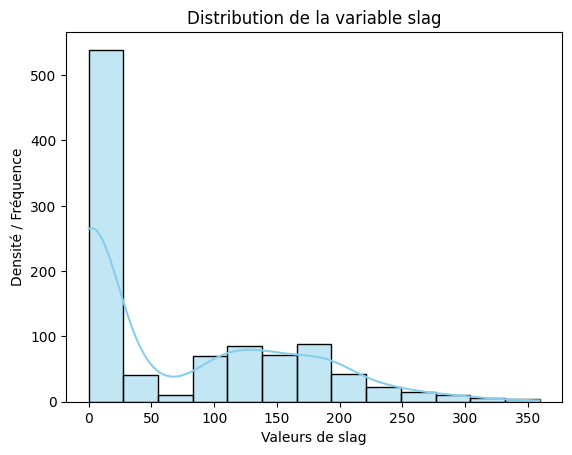

CONCLUSION: La variable <<slag>> ne suit pas une distribution normale.


In [ ]:
# Histogramme de slag
sns.histplot(data=DF, x='slag', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable slag")
plt.xlabel("Valeurs de slag")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<slag>> ne suit pas une distribution normale.")

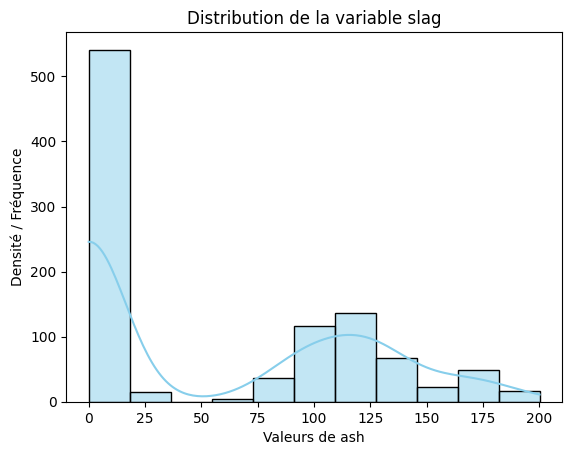

CONCLUSION: La variable <<ash>> ne suit pas une distribution normale.


In [ ]:
# Histogramme de ash
sns.histplot(data=DF, x='ash', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable slag")
plt.xlabel("Valeurs de ash")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<ash>> ne suit pas une distribution normale.")

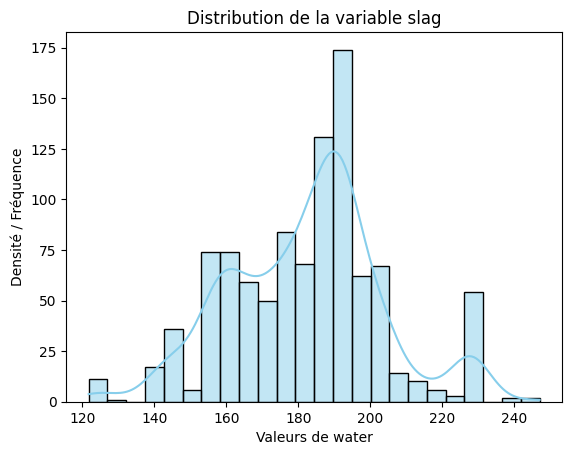

CONCLUSION: La variable <<water>> ne suit pas une distribution normale.


In [ ]:
# Histogramme de water
sns.histplot(data=DF, x='water', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable slag")
plt.xlabel("Valeurs de water")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<water>> ne suit pas une distribution normale.")

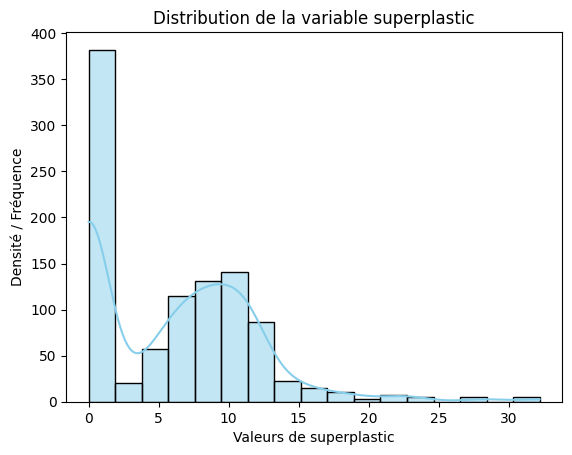

CONCLUSION: La variable <<superplastic>> ne suit pas une distribution normale.


In [ ]:
# Histogramme de superplastic
sns.histplot(data=DF, x='superplastic', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable superplastic")
plt.xlabel("Valeurs de superplastic")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<superplastic>> ne suit pas une distribution normale.")

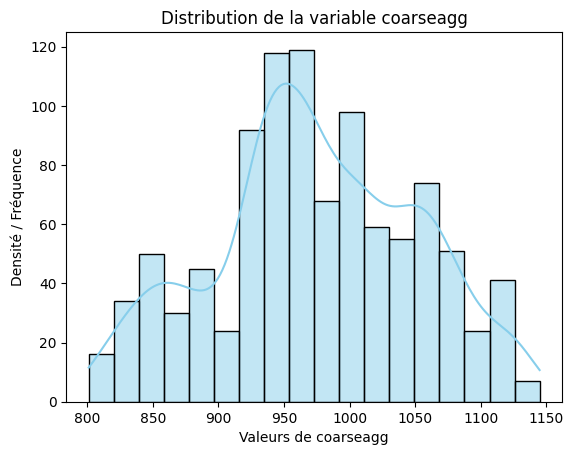

CONCLUSION: La variable <<coarseagg>> ne suit pas une distribution normale.


In [ ]:
# Histogramme de coarseagg
sns.histplot(data=DF, x='coarseagg', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable coarseagg")
plt.xlabel("Valeurs de coarseagg")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<coarseagg>> ne suit pas une distribution normale.")

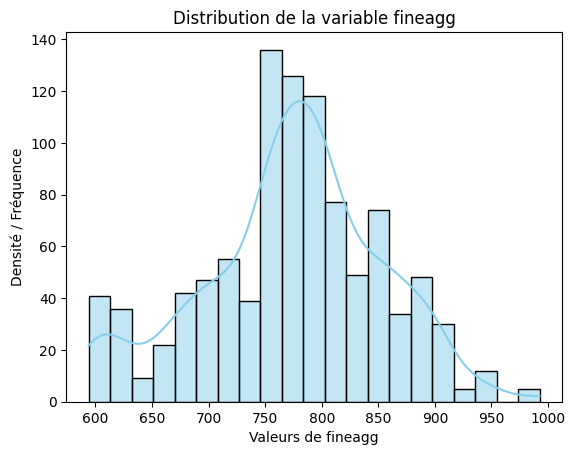

CONCLUSION: La variable <<fineagg>> semble suivre une distribution normale.


In [ ]:
# Histogramme de fineagg
sns.histplot(data=DF, x='fineagg', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable fineagg")
plt.xlabel("Valeurs de fineagg")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<fineagg>> semble suivre une distribution normale.") 

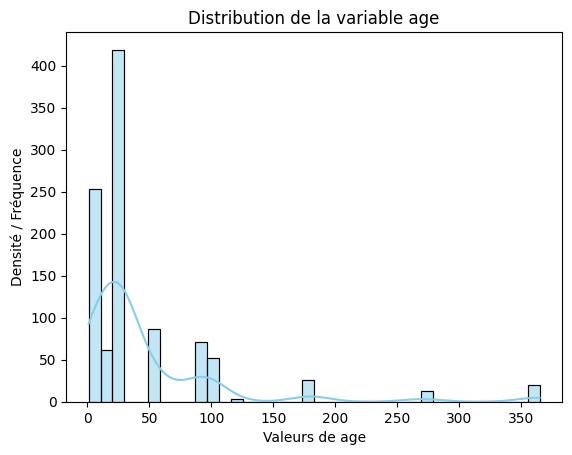

CONCLUSION: La variable <<age>> ne suit pas une distribution.


In [ ]:
# Histogramme de age
sns.histplot(data=DF, x='age', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable age")
plt.xlabel("Valeurs de age")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<age>> ne suit pas une distribution.")

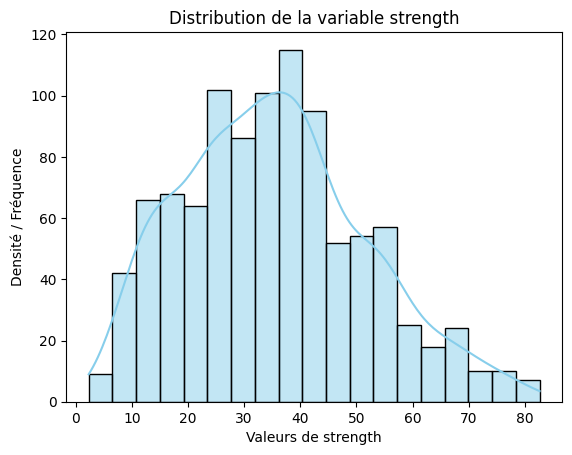

CONCLUSION: La variable <<strength>> ne suit pas une distribution.


In [ ]:
# Histogramme de strength
sns.histplot(data=DF, x='strength', kde=True, color='skyblue')
# Titre
plt.title("Distribution de la variable strength")
plt.xlabel("Valeurs de strength")
plt.ylabel("Densité / Fréquence")
plt.show()
#Interpretation
print( "CONCLUSION: La variable <<strength>> ne suit pas une distribution.")

### DETECTION ET TRAITEMENT DES VALEURS ABERRANTES

## -detection

In [14]:
def detecter_outliers_zscore(DF, colonne, seuil=3):
    """
    Détecte les outliers using le Z-score
    """
    z_scores = np.abs(stats.zscore(DF[colonne]))
    outliers = DF[z_scores > seuil]
    
    print(f"=== Outliers Z-score pour {colonne} (seuil={seuil}) ===")
    print(f"Nombre d'outliers: {len(outliers)}")
    print(f"Pourcentage: {(len(outliers)/len(DF))*100:.2f}%")
    
    return outliers

# Appliquer sur toutes les colonnes numériques
for colonne in DF:
    outliers = detecter_outliers_zscore(DF, colonne)
    if len(outliers) > 0:
        print(f"Valeurs outliers dans {colonne}:")
        print(f"Indices: {outliers.index.tolist()}")
        print(f"Valeurs: {outliers[colonne].tolist()}\n")

=== Outliers Z-score pour cement (seuil=3) ===
Nombre d'outliers: 0
Pourcentage: 0.00%
=== Outliers Z-score pour slag (seuil=3) ===
Nombre d'outliers: 4
Pourcentage: 0.40%
Valeurs outliers dans slag:
Indices: [529, 535, 547, 560]
Valeurs: [359.4, 359.4, 342.1, 342.1]

=== Outliers Z-score pour ash (seuil=3) ===
Nombre d'outliers: 0
Pourcentage: 0.00%
=== Outliers Z-score pour water (seuil=3) ===
Nombre d'outliers: 2
Pourcentage: 0.20%
Valeurs outliers dans water:
Indices: [848, 911]
Valeurs: [247.0, 246.9]

=== Outliers Z-score pour superplastic (seuil=3) ===
Nombre d'outliers: 10
Pourcentage: 1.00%
Valeurs outliers dans superplastic:
Indices: [76, 78, 94, 96, 113, 115, 131, 133, 149, 151]
Valeurs: [32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2]

=== Outliers Z-score pour coarseagg (seuil=3) ===
Nombre d'outliers: 0
Pourcentage: 0.00%
=== Outliers Z-score pour fineagg (seuil=3) ===
Nombre d'outliers: 0
Pourcentage: 0.00%
=== Outliers Z-score pour age (seuil=3) ===
Nombre d

## -detection AVEC BOXPLOTS

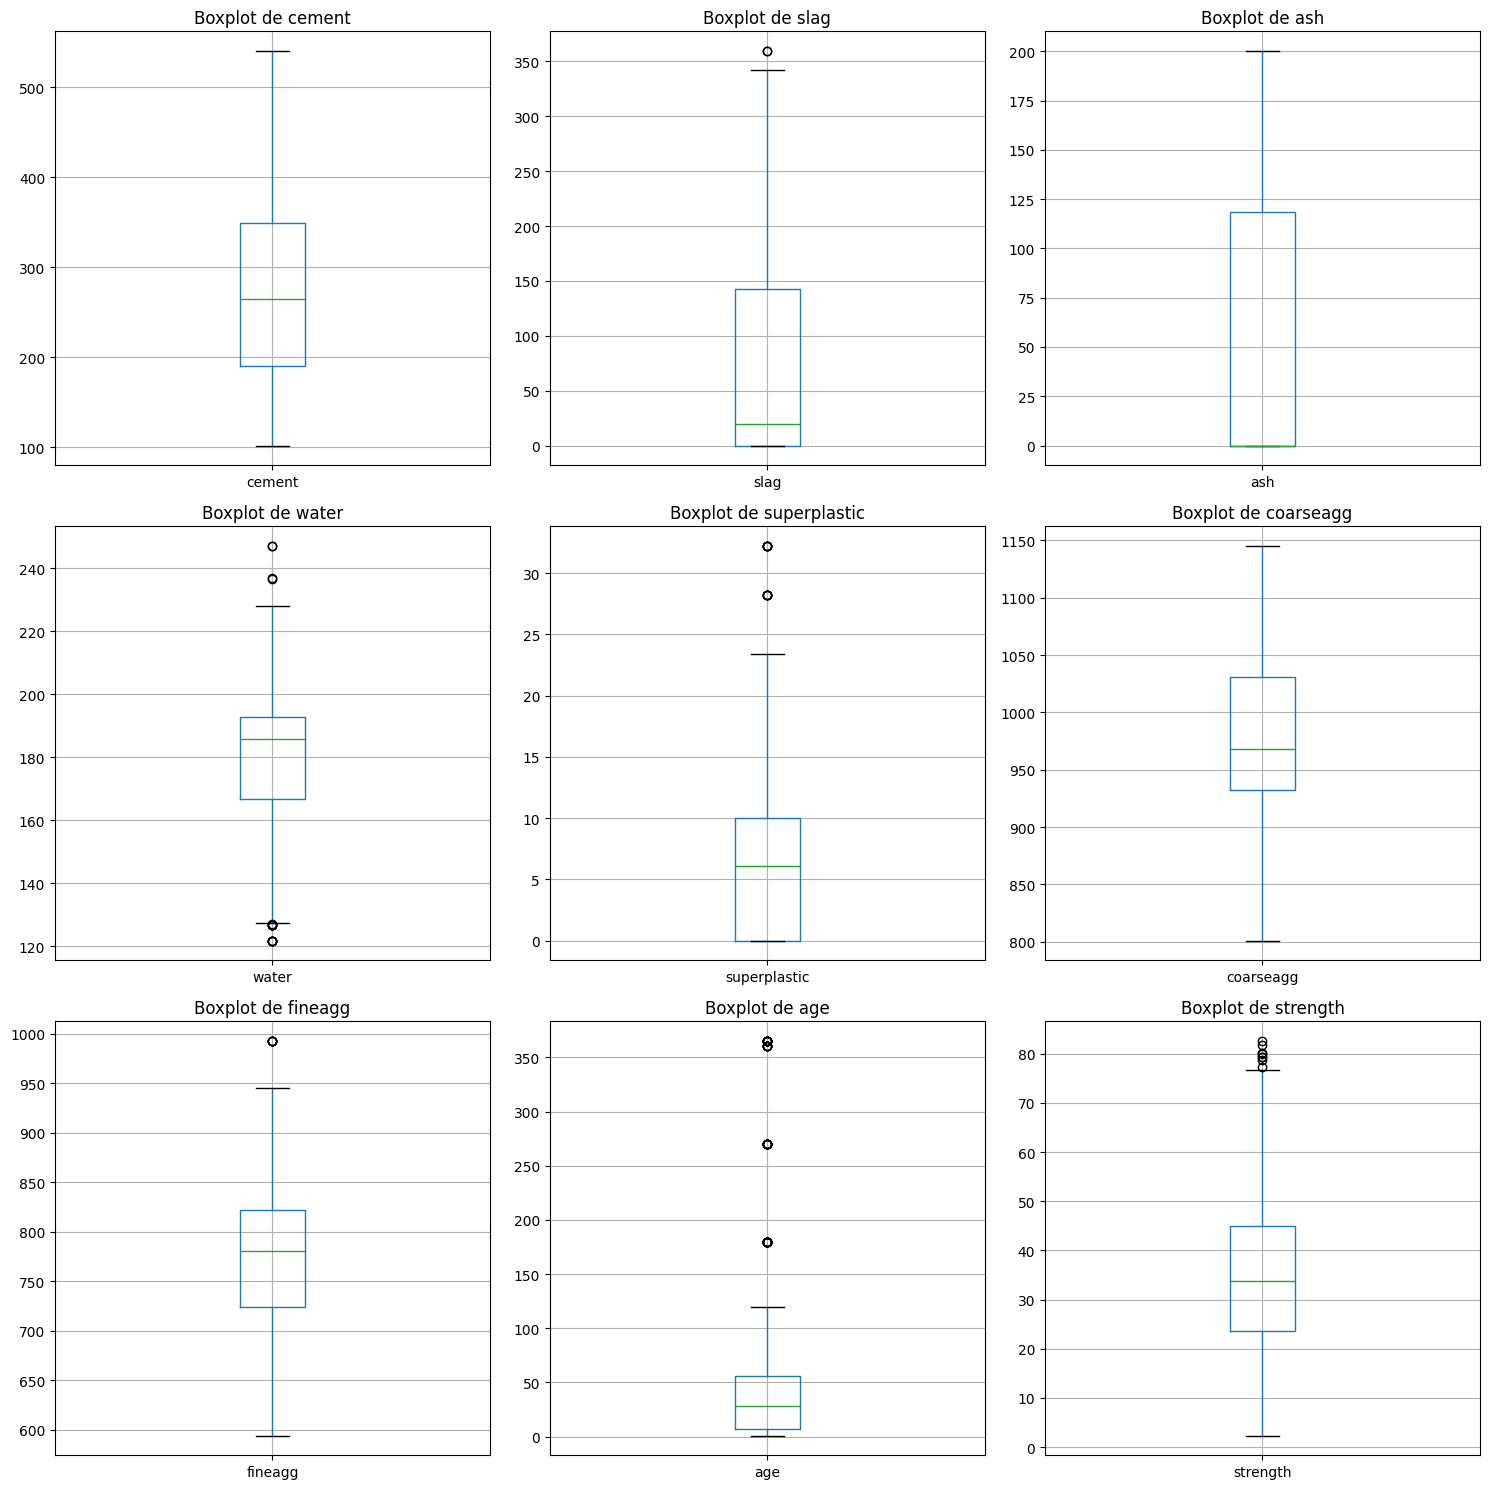

In [15]:
def visualiser_outliers_boxplot(DF):
    """
    Visualise les outliers avec des boxplots
    """
    colonnes_numeriques = DF.select_dtypes(include=[np.number]).columns
    
    # Calcul du nombre de subplots nécessaires
    n_colonnes = len(colonnes_numeriques)
    n_lignes = (n_colonnes + 2) // 3  # 3 colonnes par ligne
    
    fig, axes = plt.subplots(n_lignes, 3, figsize=(15, 5*n_lignes))
    axes = axes.flatten() if n_lignes > 1 else [axes] if n_colonnes == 1 else axes
    
    for i, colonne in enumerate(colonnes_numeriques):
        if i < len(axes):
            DF.boxplot(column=colonne, ax=axes[i])
            axes[i].set_title(f'Boxplot de {colonne}')
    
    # Cacher les axes vides
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

visualiser_outliers_boxplot(DF)

# -Traitement des valeurs extremes:les valuers superieures sont remplacer par (Q3 + 1.5 * IQR) et les valeurs inferieures par  (Q1 - 1.5 * IQR) pour chacune des variables.

In [11]:
# créer DFF directement
DFF = DF.copy()

colonnes_numeriques = DF.select_dtypes(include=[np.number]).columns

for colonne in colonnes_numeriques:
    Q1 = DF[colonne].quantile(0.25)
    Q3 = DF[colonne].quantile(0.75)
    IQR = Q3 - Q1
    limite_basse = Q1 - 1.5 * IQR
    limite_haute = Q3 + 1.5 * IQR
    
    # Remplacer les outliers
    DFF.loc[DFF[colonne] < limite_basse, colonne] = limite_basse
    DFF.loc[DFF[colonne] > limite_haute, colonne] = limite_haute

print("✅ DataFrame DFF créé avec valeurs aberrantes remplacées")
print(f"Shape de DFF: {DFF.shape}")

✅ DataFrame DFF créé avec valeurs aberrantes remplacées
Shape de DFF: (1005, 9)


C:\Users\KENGNE Martial\AppData\Local\Temp\ipykernel_16808\1301381741.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  DFF.loc[DFF[colonne] < limite_basse, colonne] = limite_basse


## -verification

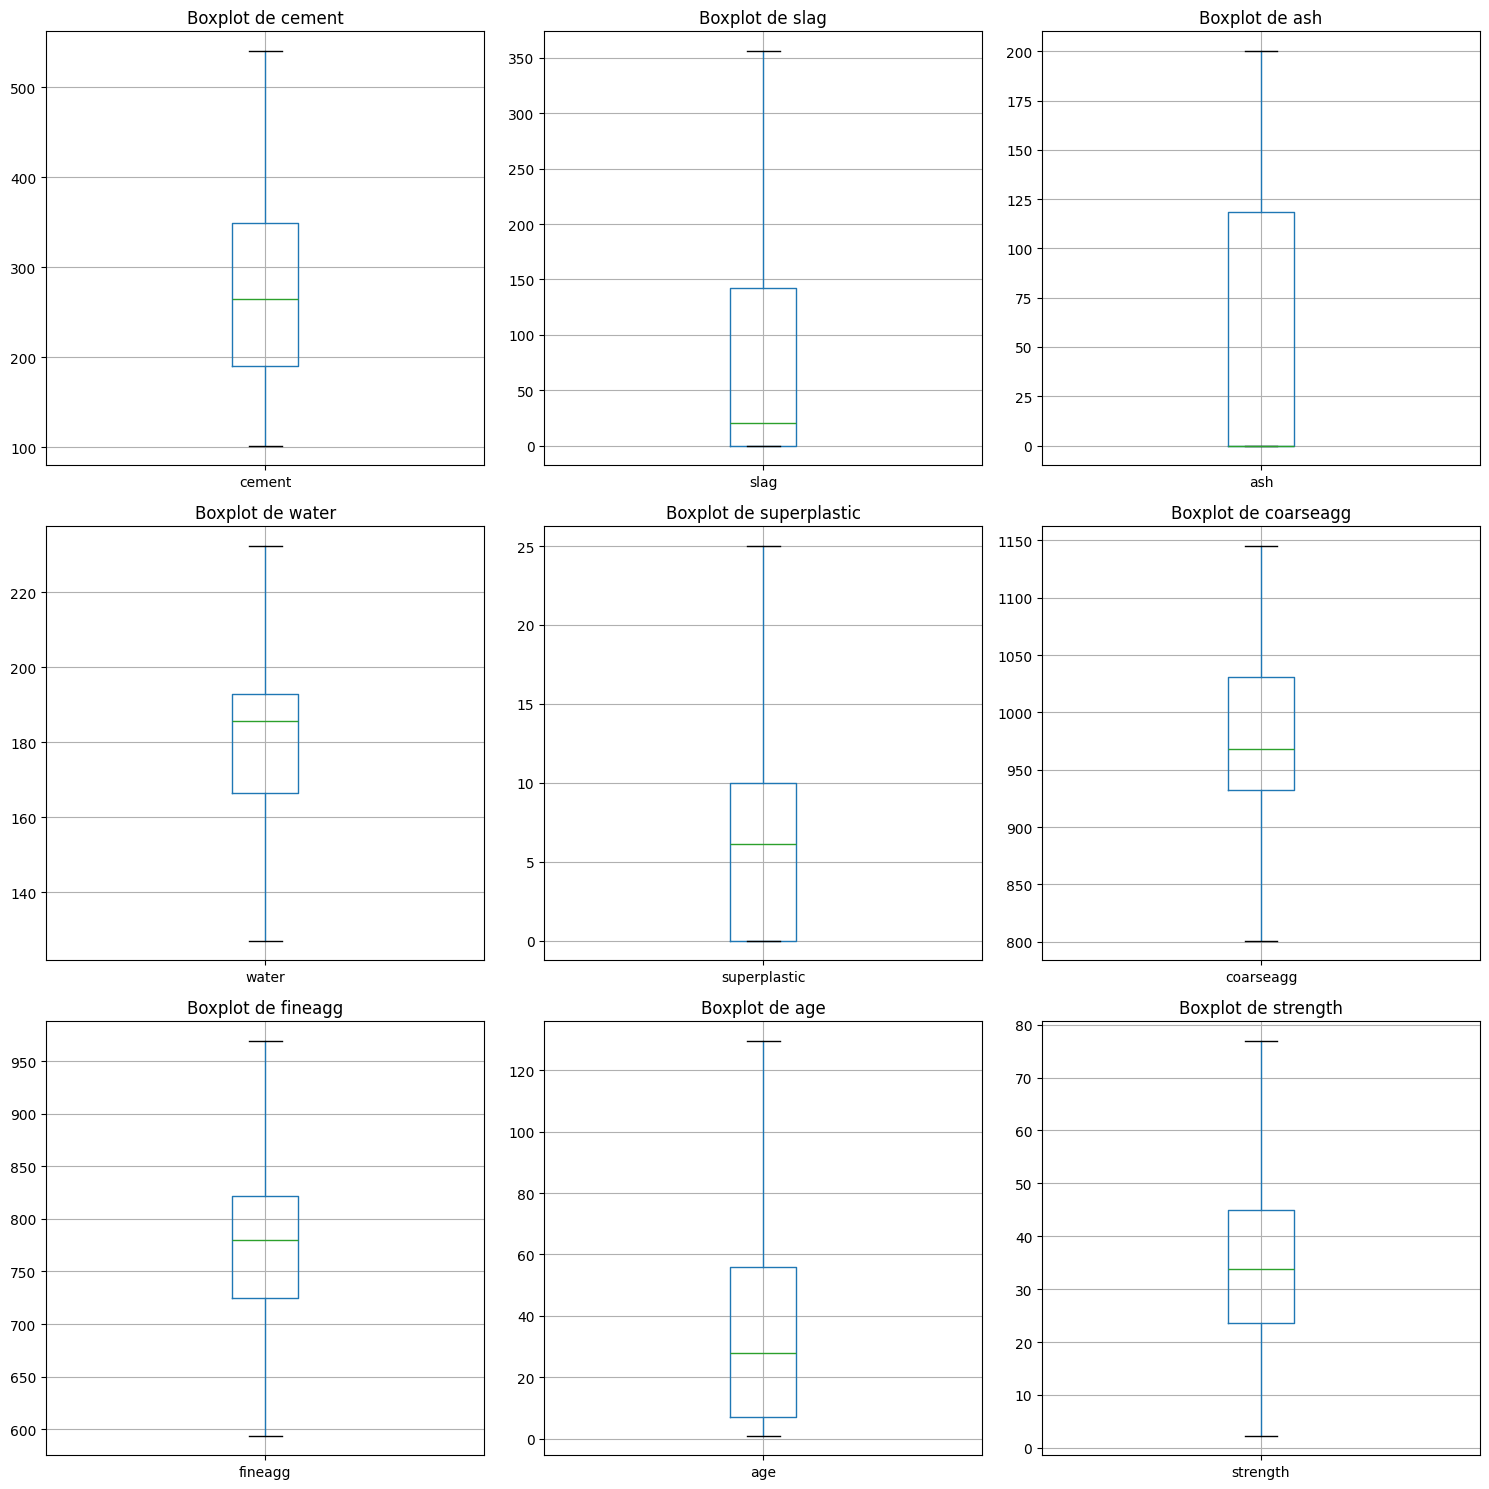

In [17]:
def visualiser_outliers_boxplot(DFF):
    """
    Visualise les outliers avec des boxplots
    """
    colonnes_numeriques = DFF.select_dtypes(include=[np.number]).columns
    
    # Calcul du nombre de subplots nécessaires
    n_colonnes = len(colonnes_numeriques)
    n_lignes = (n_colonnes + 2) // 3  # 3 colonnes par ligne
    
    fig, axes = plt.subplots(n_lignes, 3, figsize=(15, 5*n_lignes))
    axes = axes.flatten() if n_lignes > 1 else [axes] if n_colonnes == 1 else axes
    
    for i, colonne in enumerate(colonnes_numeriques):
        if i < len(axes):
            DFF.boxplot(column=colonne, ax=axes[i])
            axes[i].set_title(f'Boxplot de {colonne}')
    
    # Cacher les axes vides
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

visualiser_outliers_boxplot(DFF)

## Correlation entre les variables

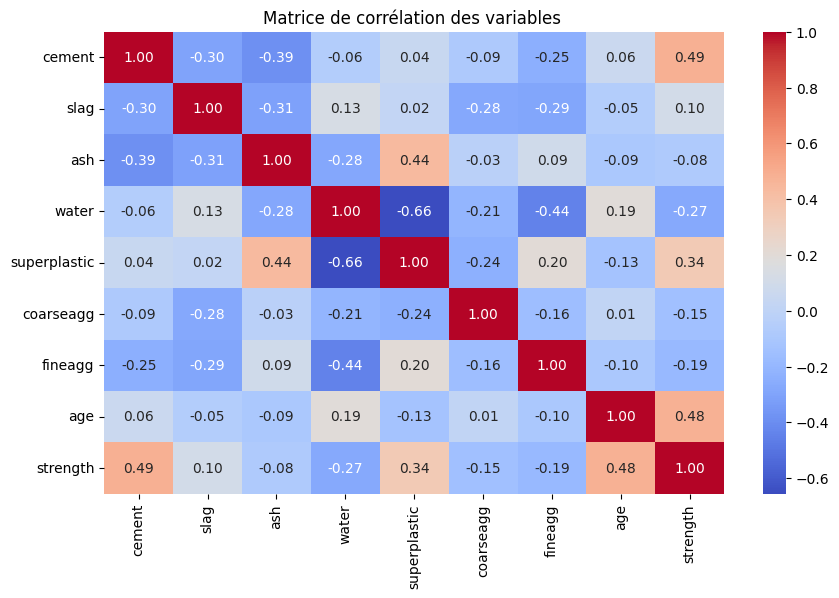

CONCLUSION: il decoule de cette matrice que les 
correlations entre les variables sont faibles ,
 ainsi chacune d'entre elles jouent un role important dans notre modele predictif. 


In [10]:
# Calcul de la matrice de corrélation
corr_matrix = DFF.corr()

# Construction du heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Titre
plt.title("Matrice de corrélation des variables ")
plt.show()
#commantaire
print("CONCLUSION: il decoule de cette matrice que les ")
print("correlations entre les variables sont faibles ,")
print(" ainsi chacune d'entre elles jouent un role important dans notre modele predictif. ")

## FEATURE SELECTION: ici nos modeles choissisent les variables de facon automatique.

# FEATURE SCALING: pas necessire aux modeles "random forest et decison tree"

## EXPORTATION DU DATASET

In [12]:
DFF.to_csv("dataset_ML.csv", index=False, encoding="utf-8")

## Separation des donnees: Ici , nous prenons 70% pour les donnees d'entrainement et 30% pour les donnes de test.

In [13]:
# Separation des variables
X = DFF.drop('strength', axis=1)   # Variables explicatives
y = DFF['strength']                # Variable cible

# Séparation en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,       # 30% pour le test
    train_size=0.7,      # 70% pour l'entraînement (optionnel)
    random_state=42,     # graine aléatoire pour la reproductibilité
    shuffle=True         # mélange les données avant séparation
)

# Vérification des dimensions
print("Taille ensemble d'entraînement :", X_train.shape)
print("Taille ensemble de test :", X_test.shape)


Taille ensemble d'entraînement : (703, 8)
Taille ensemble de test : (302, 8)


## MODELISATION

## -Entrainnement de 'DECISION TREE'

## -Sur le train

In [26]:


#  Création et entraînement du modèle sur le jeu d'entraînement
dt_model = DecisionTreeRegressor(
    random_state=42,       # pour la reproductibilité
    max_depth=None,        # profondeur maximale (None = illimitée)
    min_samples_split=2,   # min d'échantillons pour diviser un nœud
    min_samples_leaf=1     # min d'échantillons dans une feuille
)

dt_model.fit(X_train, y_train)

#  Prédictions sur le jeu de test
y_pred = dt_model.predict(X_train)

# Calcul des métriques d’évaluation
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)

#  Affichage des résultats
print("🌲 Performances du modèle Decision Tree Regression :")
print(f"MAE  (Mean Absolute Error) : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")


🌲 Performances du modèle Decision Tree Regression :
MAE  (Mean Absolute Error) : 0.143
RMSE (Root Mean Squared Error) : 1.036
R²   (Coefficient de détermination) : 0.996


## -Sur le test

In [ ]:


# entraînement du modèle sur le jeu de test
dt_model = DecisionTreeRegressor(
    random_state=42,       # pour la reproductibilité
    max_depth=None,        # profondeur maximale (None = illimitée)
    min_samples_split=2,   # min d'échantillons pour diviser un nœud
    min_samples_leaf=1     # min d'échantillons dans une feuille
)

dt_model.fit(X_test, y_test)

#  Prédictions sur le jeu de test
y_pred = dt_model.predict(X_test)

# Calcul des métriques d’évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#  Affichage des résultats
print("🌲 Performances du modèle Decision Tree Regression :")
print(f"MAE  (Mean Absolute Error) : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")

🌲 Performances du modèle Decision Tree Regression :
MAE  (Mean Absolute Error) : 0.047
RMSE (Root Mean Squared Error) : 0.491
R²   (Coefficient de détermination) : 0.999


## Entrainement de 'RANDOM FOREST'

## -Sur le train

In [ ]:
# 2️⃣ Création et entraînement du modèle sur le jeu d'entraînement
rf_model = RandomForestRegressor(
    n_estimators=100,       # nombre d’arbres dans la forêt
    random_state=42,        # pour la reproductibilité
    max_depth=None,         # profondeur maximale des arbres (None = illimitée)
    min_samples_split=2,    # min d'échantillons pour diviser un nœud
    min_samples_leaf=1      # min d'échantillons dans une feuille
)

rf_model.fit(X_train, y_train)

# 3️⃣ Prédictions sur le jeu de train
y_pred = rf_model.predict(X_train)

# 4️⃣ Calcul des métriques d’évaluation
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)

# 5️⃣ Affichage des résultats
print("🌳 Performances du modèle Random Forest Regression sur le train:")
print(f"MAE  (Mean Absolute Error) : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")



🌳 Performances du modèle Random Forest Regression sur le train:
MAE  (Mean Absolute Error) : 1.449
RMSE (Root Mean Squared Error) : 2.137
R²   (Coefficient de détermination) : 0.982


## -Sur le test

In [ ]:
# entraînement du modèle sur le jeu de test
rf_model = RandomForestRegressor(
    n_estimators=100,       # nombre d’arbres dans la forêt
    random_state=42,        # pour la reproductibilité
    max_depth=None,         # profondeur maximale des arbres (None = illimitée)
    min_samples_split=2,    # min d'échantillons pour diviser un nœud
    min_samples_leaf=1      # min d'échantillons dans une feuille
)

rf_model.fit(X_test, y_test)

#  Prédictions sur le jeu de test
y_pred = rf_model.predict(X_test)

#  Calcul des métriques d’évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#  Affichage des résultats
print("🌳 Performances du modèle Random Forest Regression sur le test :")
print(f"MAE  (Mean Absolute Error) : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error) : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")

🌳 Performances du modèle Random Forest Regression sur le test :
MAE  (Mean Absolute Error) : 1.966
RMSE (Root Mean Squared Error) : 2.756
R²   (Coefficient de détermination) : 0.973


## COMPARAISON DES DEUX MODELES

In [29]:

# 2️⃣ Création des deux modèles
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 3️⃣ Entraînement et évaluation sur le train
results = []

for name, model in models.items():
    model.fit(X_train, y_train)              # Entraînement sur le train
    y_pred_train = model.predict(X_train)    # Prédiction sur le train

    mae = mean_absolute_error(y_train, y_pred_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2 = r2_score(y_train, y_pred_train)

    results.append({
        "Modèle": name,
        "MAE (train)": round(mae, 3),
        "RMSE (train)": round(rmse, 3),
        "R² (train)": round(r2, 3)
    })

# 4️⃣ Résumé dans un tableau DataFrame
results_df = pd.DataFrame(results)

# 5️⃣ Affichage
print("📊 Performances des modèles sur le jeu d'entraînement :")
print(results_df)



📊 Performances des modèles sur le jeu d'entraînement :
          Modèle  MAE (train)  RMSE (train)  R² (train)
0  Decision Tree        0.143         1.036       0.996
1  Random Forest        1.449         2.137       0.982


In [30]:
#  Création des deux modèles
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

#  Entraînement et évaluation sur train + test
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # 🔹 Prédictions sur le train
    y_pred_train = model.predict(X_train)
    
    # 🔹 Prédictions sur le test
    y_pred_test = model.predict(X_test)
    
    # 📏 Calcul des métriques sur le train
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)
    
    # 📏 Calcul des métriques sur le test
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    
    # 🧾 Stockage des résultats
    results.append({
        "Modèle": name,
        "MAE (train)": round(mae_train, 3),
        "RMSE (train)": round(rmse_train, 3),
        "R² (train)": round(r2_train, 3),
        "MAE (test)": round(mae_test, 3),
        "RMSE (test)": round(rmse_test, 3),
        "R² (test)": round(r2_test, 3)
    })

#  Création du tableau de comparaison
results_df = pd.DataFrame(results)

#  Affichage clair
print("📊 Comparaison des performances des modèles :")
print(results_df)


📊 Comparaison des performances des modèles :
          Modèle  MAE (train)  RMSE (train)  R² (train)  MAE (test)  \
0  Decision Tree        0.143         1.036       0.996       4.268   
1  Random Forest        1.449         2.137       0.982       3.737   

   RMSE (test)  R² (test)  
0        6.340      0.858  
1        5.302      0.900  


#    Au regard des performances ci-dessus , il vient que notre meilleur modele est le 'RANDOM FOREST' car: moins de surapprentisage et meilleure generalisation sur le test. Nous passons donc a l'optimisation de notre de ce modele.

## *OPTIMISATION du modele RANDOM FOREST 

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Distribution des paramètres pour la recherche aléatoire
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.7, 0.9],
    'bootstrap': [True, False],
    'min_impurity_decrease': uniform(0.0, 0.1)
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Nombre d'itérations
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Début de l'optimisation RandomizedSearch...")
random_search.fit(X_train, y_train)

print("\nMeilleurs paramètres trouvés:")
print(random_search.best_params_)
print(f"\nMeilleur score: {random_search.best_score_:.4f}")

# Évaluation
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
print(f"\nPerformance RandomizedSearch:")
print(f"MAE:{mean_absolute_error(y_test, y_pred_random):.4f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_random):.4f}")
print(f"R²: {r2_score(y_test, y_pred_random):.4f}")

Début de l'optimisation RandomizedSearch...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Meilleurs paramètres trouvés:
{'bootstrap': False, 'max_depth': None, 'max_features': 0.5, 'min_impurity_decrease': np.float64(0.03562978380769749), 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 476}

Meilleur score: -27.8832

Performance RandomizedSearch:
MAE:3.6335
RMSE: 26.1321
R²: 0.9074


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import randint, uniform
import numpy as np

# Distribution des paramètres pour la recherche aléatoire
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.7, 0.9],
    'bootstrap': [True, False],
    'min_impurity_decrease': uniform(0.0, 0.1)
}

# Modèle de base
rf = RandomForestRegressor(random_state=42)

# Recherche aléatoire des hyperparamètres
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Nombre d'itérations
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("🔍 Début de l'optimisation RandomizedSearch...")
random_search.fit(X_train, y_train)

print("\n✅ Meilleurs paramètres trouvés :")
print(random_search.best_params_)
print(f"🏆 Meilleur score (négatif MSE CV): {random_search.best_score_:.4f}")

# Meilleur modèle
best_rf = random_search.best_estimator_

# Prédictions
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Fonctions métriques personnalisées
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    rmsle_val = rmsle(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rmse, r2, rmsle_val, mape

# Évaluation Train
mae_train, rmse_train, r2_train, rmsle_train, mape_train = evaluate_model(y_train, y_pred_train)

# Évaluation Test
mae_test, rmse_test, r2_test, rmsle_test, mape_test = evaluate_model(y_test, y_pred_test)

# Affichage des résultats
print("\n📊 **Performance du modèle Random Forest optimisé :**")
print("\n--- Ensemble d'entraînement ---")
print(f"MAE   : {mae_train:.4f}")
print(f"RMSE  : {rmse_train:.4f}")
print(f"R²    : {r2_train:.4f}")
print(f"RMSLE : {rmsle_train:.4f}")
print(f"MAPE  : {mape_train:.4f}")

print("\n--- Ensemble de test ---")
print(f"MAE   : {mae_test:.4f}")
print(f"RMSE  : {rmse_test:.4f}")
print(f"R²    : {r2_test:.4f}")
print(f"RMSLE : {rmsle_test:.4f}")
print(f"MAPE  : {mape_test:.4f}")


🔍 Début de l'optimisation RandomizedSearch...


Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\KENGNE Martial\Documents\Venv\PythonDS\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KENGNE Martial\Documents\Venv\PythonDS\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KENGNE Martial\Documents\Venv\PythonDS\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\KENGNE Martial\Documents\Venv\PythonDS\lib\site-packages\sklearn\base.py", line 471, in _validate_


✅ Meilleurs paramètres trouvés :
{'bootstrap': False, 'max_depth': None, 'max_features': 0.5, 'min_impurity_decrease': np.float64(0.03562978380769749), 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 476}
🏆 Meilleur score (négatif MSE CV): -27.8832

📊 **Performance du modèle Random Forest optimisé :**

--- Ensemble d'entraînement ---
MAE   : 1.0216
RMSE  : 1.5984
R²    : 0.9900
RMSLE : 0.0633
MAPE  : 0.0400

--- Ensemble de test ---
MAE   : 3.6335
RMSE  : 5.1120
R²    : 0.9074
RMSLE : 0.1740
MAPE  : 0.1355


## EXPORTATION DU MODELE

In [17]:
# Supposons que best_rf est votre modèle Random Forest optimisé
pickle.dump(best_rf, open('random_forest_model.pkl', 'wb'))